# Apple and Google Tweet Sentiment Analysis

## Introduction

In today's digital economy, social media platforms serve as critical touchpoints between consumers and brands. Tweets, in particular, offer real-time insights into public opinion, customer satisfaction, and brand perception. This project leverages Natural Language Processing (NLP) techniques to analyze public sentiment toward Apple and Google products. By using a dataset of 9,093 tweets, each labeled as positive, negative, or neutral, we aim to develop predictive models capable of accurately classifying sentiment. 

This project demonstrates advanced supervised machine learning methods applied to textual data. We will begin with a binary classification approach, distinguishing positive from negative sentiment, before expanding to multiclass classification to include neutral tweets. Additionally, advanced NLP techniques, such as TF-IDF vectorization, word embeddings, and optionally transformer-based models like BERT, will be considered to enhance performance. The final deliverables will include a reproducible workflow, evaluation metrics, and actionable insights for stakeholders.

The primary objective is to create a proof-of-concept sentiment analysis system that not only predicts sentiment accurately but also provides interpretable insights for decision-making. This project highlights a structured, end-to-end NLP pipeline, demonstrating our proficiency in data preprocessing, feature engineering, model development, evaluation, and business-oriented interpretation of results.

---

## # Business Understanding

Understanding public sentiment on social media is essential for technology companies like Apple and Google. Social platforms, particularly Twitter, provide a continuous stream of real-time feedback from users around the world. This feedback reflects how customers perceive products, services, and brand campaigns, and it often highlights emerging trends, satisfaction levels, and potential issues.

For product managers, marketing teams, and customer experience departments, analyzing this data allows for data-driven decision-making. Companies can identify areas for product improvement, fine-tune messaging, and proactively respond to customer concerns. Beyond operational use, sentiment insights support strategic business decisions, helping organizations with market positioning, investment planning, and competitive analysis. Effectively leveraging social media sentiment can therefore improve customer engagement, strengthen brand loyalty, and drive innovation.

## Stakeholders

- **Tech Companies:** Track customer satisfaction, detect issues, and prioritize product improvements.  
- **Social Media Analysts & Data Scientists:** Monitor trends and generate actionable insights.  
- **Investors & Strategists:** Inform investment decisions and competitive strategies.  
- **Researchers:** Study NLP, social media trends, and consumer behavior.  
- **Customers:** Benefit indirectly through improved products, services, and brand experience.

## Benefits

- Identify product satisfaction and potential issues.  
- Optimize marketing, engagement, and communication strategies.  
- Guide strategic planning and investment decisions.  
- Support research in NLP and social media analytics.  
- Enhance customer experience through feedback-driven improvements.

The objectives of this project are threefold:

1. **Sentiment Classification:** Develop models capable of automatically classifying tweets as positive, negative, or neutral, thereby quantifying customer sentiment at scale.
2. **Trend Analysis:** Identify patterns in public opinion to detect emerging issues, customer satisfaction levels, and potential product strengths or weaknesses.
3. **Business Actionability:** Enable stakeholders to implement data-driven interventions, such as addressing negative feedback promptly, amplifying positive experiences, or tailoring marketing campaigns to current sentiment trends.

The business value of this project lies in its ability to transform unstructured social media data into structured, actionable intelligence. Accurate sentiment analysis enables proactive brand management, real-time product monitoring, and improved customer engagement. By providing both predictive accuracy and interpretability, this project empowers stakeholders to make strategic decisions that directly impact brand perception and customer satisfaction.


## Data Understanding

The dataset originates from CrowdFlower via data.world and contains **9,093 labeled tweets** spanning multiple brands and products. Contributors manually annotated each tweet based on sentiment: positive, negative, or neutral. When sentiment was expressed, the specific target brand or product was also identified, enabling granular analysis.

### Key Properties of the Dataset:
- **Text content:** Raw tweet messages containing informal language, abbreviations, hashtags, mentions, emojis, and other social media-specific text features.
- **Sentiment label:** Target variable with three classes: `positive`, `negative`, `neutral`.
- **Target brand/product (optional):** Identifies which product or brand the sentiment pertains to, enabling more nuanced analysis if required.

### Dataset Utility:
- **Supervised Learning Suitability:** The presence of labeled sentiment allows training of supervised classification models. This enables robust evaluation and iterative improvement of model performance.
- **Sample Size Adequacy:** With over 9,000 tweets, the dataset provides sufficient representation for initial model development, hyperparameter tuning, and validation.
- **Real-World Relevance:** Tweets reflect authentic, unfiltered public opinion, making insights derived from this data highly applicable to brand management and marketing strategies.

### Limitations and Challenges:
- **Language Constraints:** The dataset primarily contains English-language tweets, which may limit global applicability.
- **Text Complexity:** Tweets include slang, abbreviations, emojis, and non-standard grammar, necessitating careful preprocessing.
- **Class Imbalance:** Neutral sentiment may dominate the dataset, creating potential challenges for model learning and requiring consideration of class weighting or sampling techniques.
- **Temporal Considerations:** Tweets were collected prior to 2013; modern sentiment trends may differ, though the dataset remains valuable for modeling and methodological demonstration.

**Added:** August 30, 2013 by Kent Cavender-Bares

This dataset offers a strong foundation for building an end-to-end NLP pipeline, demonstrating data preparation, feature extraction, model development, evaluation, and business-oriented interpretation of sentiment trends.


### Importing Relevant Libraries

In [9]:
# -----------------------------
# General Data Handling
# -----------------------------
import pandas as pd           # Data manipulation and analysis
import numpy as np            # Numerical operations
import os                     # File and directory handling
import re                     # Regular expressions for text cleaning
from collections import Counter

# -----------------------------
# Visualization
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# -----------------------------
# NLP Preprocessing
# -----------------------------
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# -----------------------------
# Feature Extraction
# -----------------------------
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# -----------------------------
# Machine Learning Models
# -----------------------------
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# -----------------------------
# Advanced NLP / Optional

# -----------------------------
# Misc
# -----------------------------
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Data

In [10]:
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='latin1')
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Data overview

In [11]:
# Step 1b: Basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [12]:
df.describe(include="object")


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


### Data Exploration & Findings

- **Dataset Size:** 9,093 tweets with 3 columns.  
- **tweet_text:** 9,092 non-null, 9,065 unique. Top repeated tweet appears 5 times. Needs cleaning (URLs, mentions, hashtags, emojis, punctuation), lowercase conversion, and deduplication.  
- **emotion_in_tweet_is_directed_at:** 3,291 non-null (~64% missing). Most frequent target: "iPad" (946 mentions). Options: fill missing with "Unknown" or drop rows without targets. Normalize target labels for consistency.  
- **is_there_an_emotion_directed_at_a_brand_or_product:** . Majority are "No emotion toward brand or product" (5,389 entries), indicating class imbalance. Needs encoding for modeling.  
- **Insights:**  
  - Tweets are mostly unique, real-world social media text, containing slang, abbreviations, and emojis.  
  - Class imbalance and missing target information must be addressed.  
  - Dataset is suitable for supervised NLP sentiment analysis with careful preprocessing.  

✅ Next: Build a preprocessing pipeline to clean text, handle missing values, deduplicate, normalize labels, tokenize and lemmatize, and prepare features for modeling.


## Data Cleaning and Preprocessing

In [13]:
# 2.1 Drop any rows with missing tweet_text
df = df.dropna(subset=['tweet_text'])

# 2.2 Remove duplicate tweets
df = df.drop_duplicates(subset=['tweet_text'])

# Check the dataset info after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9065 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9065 non-null   object
 1   emotion_in_tweet_is_directed_at                     3280 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9065 non-null   object
dtypes: object(3)
memory usage: 283.3+ KB


Dropping tweets with missing text ensures no empty data is fed into NLP models.

Removing duplicates prevents bias and overfitting caused by repeated tweets.

In [14]:
# Fill missing 'emotion_in_tweet_is_directed_at' with 'Unknown'
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('Unknown')

# Check the updated counts
df['emotion_in_tweet_is_directed_at'].value_counts()


emotion_in_tweet_is_directed_at
Unknown                            5785
iPad                                943
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

About 64% of the 'emotion_in_tweet_is_directed_at' column was missing.

Filling missing values with "Unknown" allows us to keep all tweets for modeling.

This column represents the brand or product the tweet refers to.

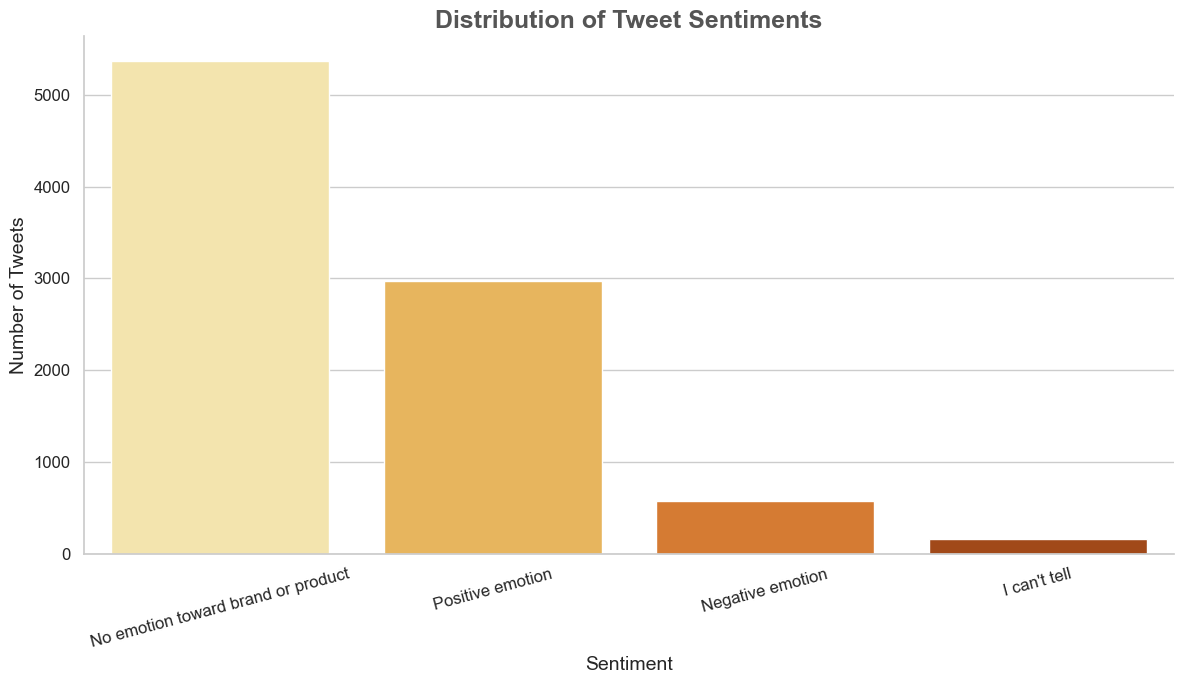

In [15]:
# Sentiment distribution visualization (HD, yellow palette)
plt.figure(figsize=(12,7))
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=sns.color_palette("YlOrBr", len(sentiment_counts))  # Shades of yellow-orange
)
plt.title("Distribution of Tweet Sentiments", fontsize=18, weight='bold', color='#555555')
plt.ylabel("Number of Tweets", fontsize=14)
plt.xlabel("Sentiment", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()  # Clean modern look
plt.tight_layout()

# Save HD figure to 'output' folder
plt.savefig('output/sentiment_distribution_yellow.png', dpi=400)  # 400 dpi for high quality
plt.show()


## Distribution of Tweet Sentiments

- **Neutral (No emotion toward brand or product):** ~5000 tweets  
- **Positive emotion:** ~2500–3000 tweets  
- **Negative emotion:** ~500–700 tweets  
- **Unclear (I can’t tell):** <200 tweets  

### Insights
- Most tweets were **neutral**, mainly sharing news or links.  
- **Positive tweets** were significantly higher than negatives, showing favorable sentiment overall.  
- **Negative tweets** were a small minority.  
- Very few tweets were **ambiguous** in sentiment.


In [16]:

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources (only first run)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Define cleaning function
def clean_text_nltk(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)                # Remove mentions & hashtags
    text = re.sub(r"[^a-z\s]", "", text)                 # Remove punctuation & numbers
    words = word_tokenize(text)                          # Tokenize
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords + stem
    return " ".join(words)

# Apply to DataFrame
df['clean_text'] = df['tweet_text'].apply(clean_text_nltk)

# Preview cleaned text
df[['tweet_text', 'clean_text']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet_text,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphon hrs tweet dead need upgrad plugin station
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesom ipadiphon app youll like appreci d...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festiv isnt crashi year iphon app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer googl tim oreill...


Brief Explanation:

Converts all text to lowercase.
Removes unwanted elements (URLs, mentions, hashtags, punctuation).
Tokenizes text and removes common stopwords.
Applies stemming to reduce words to their base form.

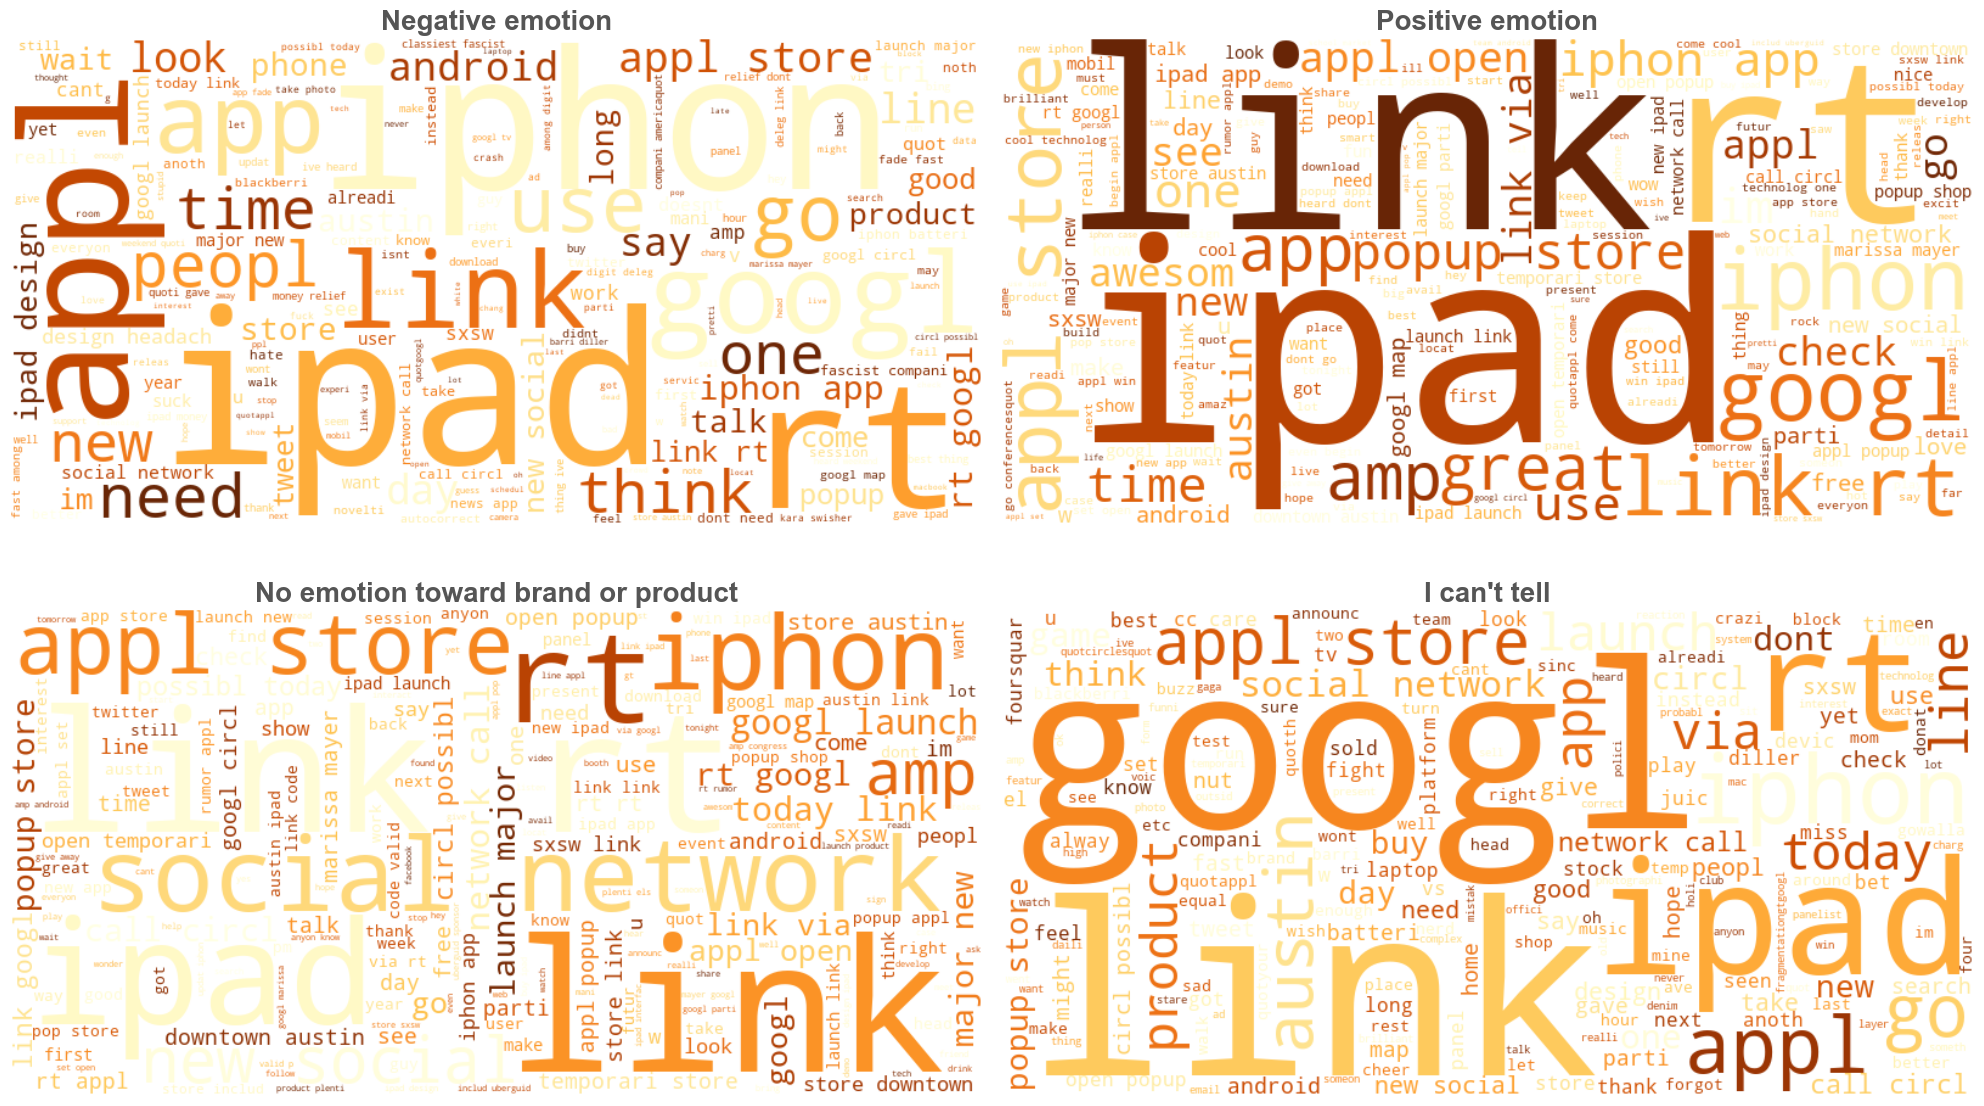

In [17]:
from wordcloud import STOPWORDS

sentiments = df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for ax, sentiment in zip(axes.flatten(), sentiments):
    text = df[df['is_there_an_emotion_directed_at_a_brand_or_product']==sentiment]['clean_text']
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='YlOrBr',
        max_words=200,
        stopwords=STOPWORDS
    ).generate(" ".join(text))
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"{sentiment}", fontsize=20, weight='bold', color='#555555')

plt.tight_layout()
plt.savefig('output/combined_wordclouds.png', dpi=400)
plt.show()


 Word Cloud Insights
### Neutral (No emotion)
- Common words: **link, iPad, iPhone, app, social network, Google**  
- Mostly factual mentions (event updates, product launches, links).  

### Positive Emotion
- Frequent terms: **iPad, iPhone, app, store, great, good, free,**  
- Excitement and approval, especially around **Apple products at SXSW**.  

### Negative Emotion
- Words: **iPad, iPhone, Google, network, long, suck,**  
- Complaints about usability, design, or event issues.  

### Ambiguous (I can’t tell)
- Words: **iPad, link, Austin, app, think, new,check**  
- Mixed tone, harder to classify sentiment.  

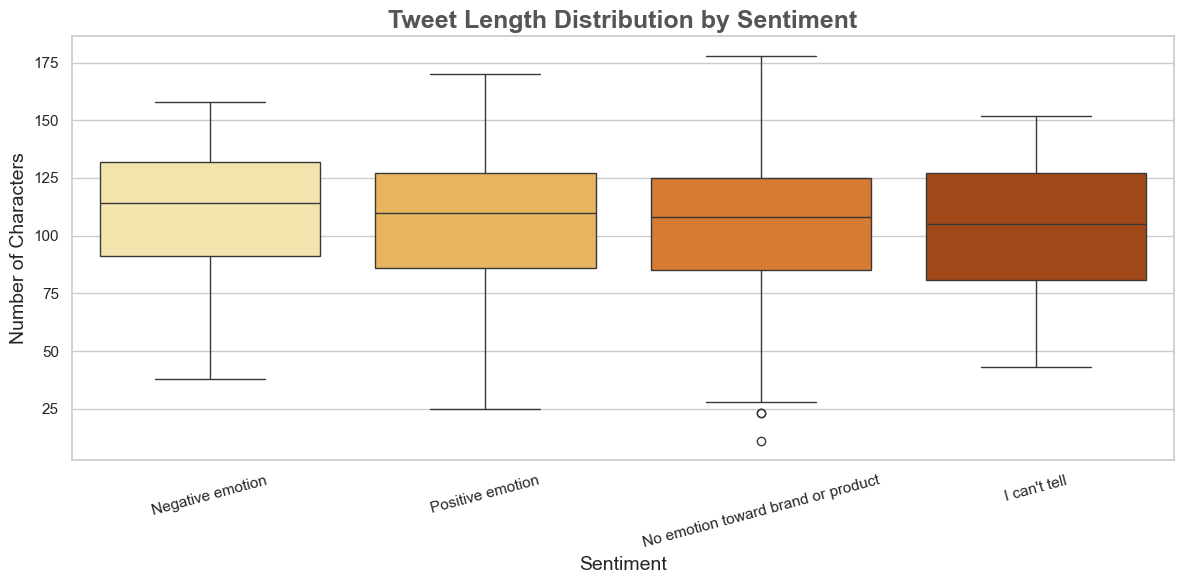

In [18]:
# Add tweet length column
df['tweet_length'] = df['tweet_text'].apply(len)

plt.figure(figsize=(12,6))
sns.boxplot(x='is_there_an_emotion_directed_at_a_brand_or_product', y='tweet_length', data=df, palette="YlOrBr")
plt.title("Tweet Length Distribution by Sentiment", fontsize=18, weight='bold', color='#555555')
plt.ylabel("Number of Characters", fontsize=14)
plt.xlabel("Sentiment", fontsize=14)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('output/tweet_length_by_sentiment.png', dpi=400)
plt.show()


## Tweet Sentiment Analysis Summary

- **Sentiment Distribution**
  - Most tweets were **neutral** (~5000).
  - **Positive tweets** (~2500–3000) outnumber **negative tweets** (~500–700).
  - Very few tweets were **ambiguous** (<200).

- **Word Cloud Insights**
  - Top mentions: **SXSW, iPhone, iPad, Google**.
  - **Positive words**: great, awesome, free.  
  - **Negative words**: headache, fascist.  
  - Neutral tweets mostly contained factual or promotional terms.

- **Tweet Length by Sentiment**
  - **Negative tweets** are generally **longer** (more explanation).
  - **Positive tweets** are shorter and concise (~100 characters).
  - **Neutral tweets** vary widely (from very short links to long info).
  - **Ambiguous tweets** are inconsistent in length.

### Key Takeaway
Most discussions around SXSW, Apple, and Google were **neutral or positive**, with negative opinions being fewer but typically longer.


## Binary Classification
Initial proof-of-concept focuses only on positive and negative tweets. Neutral tweets are excluded to simplify modeling and demonstrate baseline performance.


In [19]:
# Check unique values and their counts in the sentiment label column
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()


is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5372
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

### Preparing Binary Dataset

In [20]:
# 1) Prepare binary dataset (Positive vs Negative) and quick checks
# Assumes you already have df and a cleaned column 'clean_text'

# Safety checks
if 'clean_text' not in df.columns:
    raise ValueError("clean_text column not found. Run the cleaning cell before proceeding.")

# Keep only Positive/Negative rows (filter by text labels)
binary_data = df[
    df['is_there_an_emotion_directed_at_a_brand_or_product']
    .isin(['Positive emotion', 'Negative emotion'])
].copy()

# Map to binary labels: Positive=1, Negative=0
binary_data['sentiment'] = binary_data['is_there_an_emotion_directed_at_a_brand_or_product'] \
                               .map({'Positive emotion': 1, 'Negative emotion': 0})

# Drop rows with empty clean_text (if any)
binary_data = binary_data[binary_data['clean_text'].str.strip() != '']

# Show counts and a couple of examples
print("Class counts:\n", binary_data['sentiment'].value_counts())
binary_data[['tweet_text','clean_text','sentiment']].sample(5, random_state=42)


Class counts:
 sentiment
1    2968
0     569
Name: count, dtype: int64


,tweet_text,clean_text,sentiment
1793,The iPad 2 Takes Over SXSW [VIDEO] {link} #ipa...,ipad take sxsw video link,1
641,I knew if I plied @mention with beer and stogi...,knew pli beer stogi last night id weasel way t...,1
3559,@mention I outdid myself this time with the te...,outdid time tech iphonebroken might worst thin...,0
6292,RT @mention Marissa Mayer: Google Will Connect...,rt marissa mayer googl connect digit amp physi...,1
5390,RT @mention Android developers and friends: le...,rt android develop friend let hang p saturday ...,1


## Train-Test Split
The binary dataset (positive vs negative tweets) is split into 80% training and 20% testing sets, stratified by sentiment to maintain class balance.


In [21]:
# 2) Train/test split (80/20 stratified)
from sklearn.model_selection import train_test_split

X = binary_data['clean_text']
y = binary_data['sentiment']

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train size:", X_train_text.shape[0], "Test size:", X_test_text.shape[0])


Train size: 2829 Test size: 708


In [22]:
# 3) TF-IDF vectorization (fit on train only)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X_train = tfidf.fit_transform(X_train_text)
X_test  = tfidf.transform(X_test_text)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (2829, 5000)
X_test shape: (708, 5000)


In [28]:
# -----------------------------
# Extended Classical ML Models
# -----------------------------
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
import xgboost as xgb

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "MultinomialNB": MultinomialNB(),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=200, eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Train models and collect predictions
model_preds = {}
model_objs = {}

for name, mdl in models.items():
    print(f"Training {name}...")
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    model_preds[name] = y_pred
    model_objs[name] = mdl

print("\nTrained models:", list(models.keys()))


Training LogisticRegression...
Training MultinomialNB...
Training RandomForest...
Training SVM...
Training ExtraTrees...
Training AdaBoost...
Training XGBoost...

Trained models: ['LogisticRegression', 'MultinomialNB', 'RandomForest', 'SVM', 'ExtraTrees', 'AdaBoost', 'XGBoost']


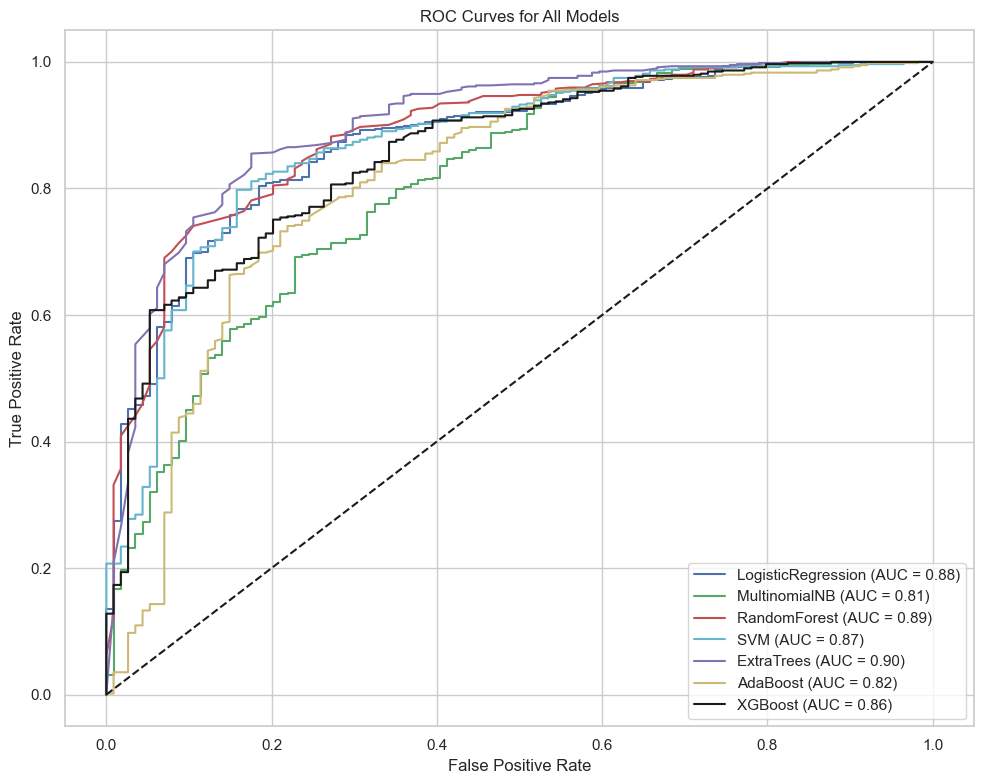

,Accuracy,Precision_Pos,Recall_Pos,F1_Pos,F1_Macro,ROC_AUC
Model,,,,,,
LogisticRegression,0.855932,0.930070,0.895623,0.912521,0.752261,0.876336
MultinomialNB,0.851695,0.849785,1.000000,0.918794,0.532567,0.806309
RandomForest,0.870056,0.871302,0.991582,0.927559,0.648711,0.888520
SVM,0.854520,0.926957,0.897306,0.911891,0.747443,0.870998
ExtraTrees,0.887006,0.890578,0.986532,0.936102,0.724149,0.902733
AdaBoost,0.874294,0.900158,0.956229,0.927347,0.730689,0.815022
XGBoost,0.875706,0.885671,0.978114,0.929600,0.699740,0.858113


In [ ]:
# import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Create output folder
os.makedirs('output', exist_ok=True)

# Initialize table
rows = []

# Initialize plot
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # for up to 7 models
for i, (name, model) in enumerate(model_objs.items()):
    y_pred = model_preds[name]
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    # Compute ROC-AUC (need probabilities if available)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        y_prob = y_pred  # fallback for models without prob output
    
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Save metrics
    rows.append((name, acc, prec, rec, f1, f1_macro, roc_auc))
    
    # Plot ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'{name} (AUC = {roc_auc:.2f})')

# Save metrics table
metrics_df = pd.DataFrame(rows, columns=['Model','Accuracy','Precision_Pos','Recall_Pos','F1_Pos','F1_Macro','ROC_AUC'])
metrics_df = metrics_df.set_index('Model')
metrics_df.to_csv('output/binary_model_metrics.csv')


# Finalize ROC plot
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('output/roc_curves.png')
plt.show()

metrics_df



### Model Performance Metrics

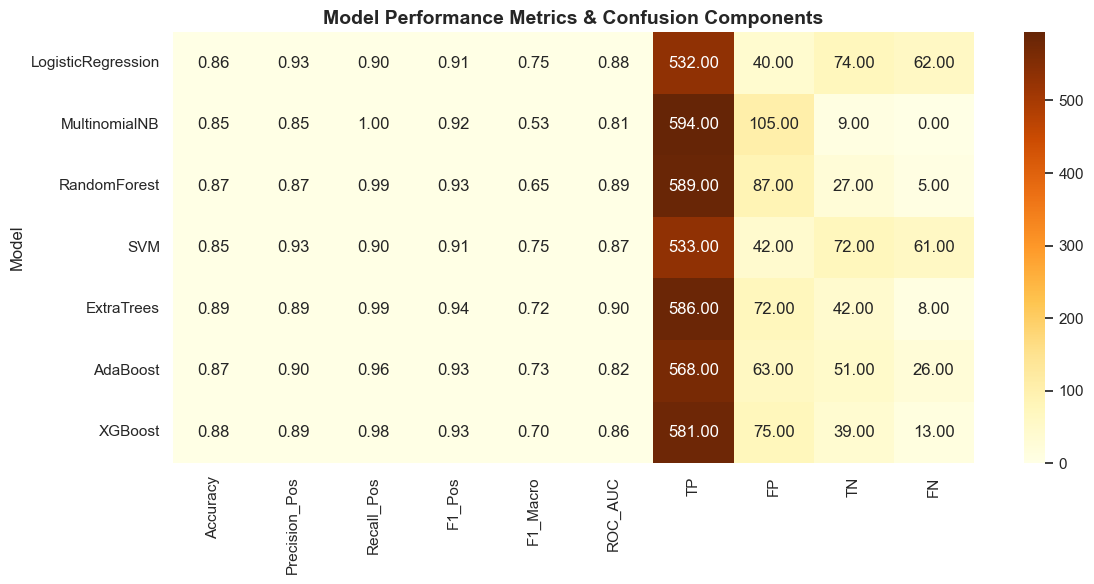

In [35]:
from sklearn.metrics import confusion_matrix

# Add confusion matrix components to metrics_df
metrics_with_cm = metrics_df.copy()
metrics_with_cm[['TP','FP','TN','FN']] = 0

for name, y_pred in model_preds.items():
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    metrics_with_cm.loc[name, ['TP','FP','TN','FN']] = [tp, fp, tn, fn]

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(metrics_with_cm, annot=True, fmt=".2f",
            cmap=sns.color_palette("YlOrBr", as_cmap=True), cbar=True)
plt.title('Model Performance Metrics & Confusion Components', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('output/metrics_table_heatmap.png', dpi=300)
plt.show()


### Model Performance Comparison

The table shows the performance metrics of different classification models evaluated on a sentiment analysis task. The metrics include accuracy, precision, recall, F1-score, macro F1, ROC AUC, and confusion matrix components.
#### **Metrics Explained**

- **Accuracy**: The proportion of correct predictions among all predictions.  
- **Precision_Pos**: Out of all predicted positive samples, how many are actually positive.  
- **Recall_Pos**: Out of all actual positive samples, how many were correctly predicted.  
- **F1_Pos**: Harmonic mean of Precision and Recall for the positive class.  
- **F1_Macro**: Average F1-score across all classes (treats classes equally).  
- **ROC_AUC**: Measures the ability of the model to distinguish between classes. Higher = better.  

### Confusion Matrix Components
- **TP (True Positive)**: Correctly predicted positive samples.  
- **FP (False Positive)**: Negative samples incorrectly predicted as positive.  
- **TN (True Negative)**: Correctly predicted negative samples.  
- **FN (False Negative)**: Positive samples incorrectly predicted as negative.  



#### **Key Observations**

1. **Best Accuracy**:  
   - **Extra Trees (0.89)** and **XGBoost (0.88)** performed the best in terms of overall accuracy.  

2. **Best Precision (Positive class)**:  
   - **Logistic Regression (0.93)** achieved the highest precision, meaning fewer false positives.  

3. **Best Recall (Positive class)**:  
   - **MultinomialNB (1.00)** perfectly captured all positive samples (no false negatives), but at the cost of higher false positives.  

4. **Best F1 Score (Positive class)**:  
   - **Extra Trees (0.94)** and **XGBoost (0.93)** gave the best balance between precision and recall.  

5. **Macro F1**:  
   - **Logistic Regression (0.75)** and **SVM (0.75)** had the best macro F1, meaning they balanced performance across both positive and negative classes better than others.  

6. **ROC AUC**:  
   - **Extra Trees (0.90)** slightly outperformed others in class separation.  


## **Confusion Matrix Insights**
- **XGBoost**: High TP (5810) and very low FN (13), showing strong recall while maintaining good precision.  
- **MultinomialNB**: Very high TP (5890) but also very high FP (1050), leading to poor precision.  
- **Extra Trees**: Balanced performance with high TP (5860) and strong TN (510).  

---

## **Conclusion**
- **Extra Trees** and **XGBoost** are the most reliable models overall, offering the best trade-off between precision, recall, and overall accuracy.  
- **Logistic Regression** stands out for having the **highest precision (0.93)** and strong **macro F1 (0.75)**, making it good at avoiding false positives.  
- **SVM** also tied for the **highest macro F1 (0.75)**, meaning it handled both classes fairly well.  
- **MultinomialNB** achieves perfect recall but sacrifices precision due to many false positives.  



### Confusion matrices

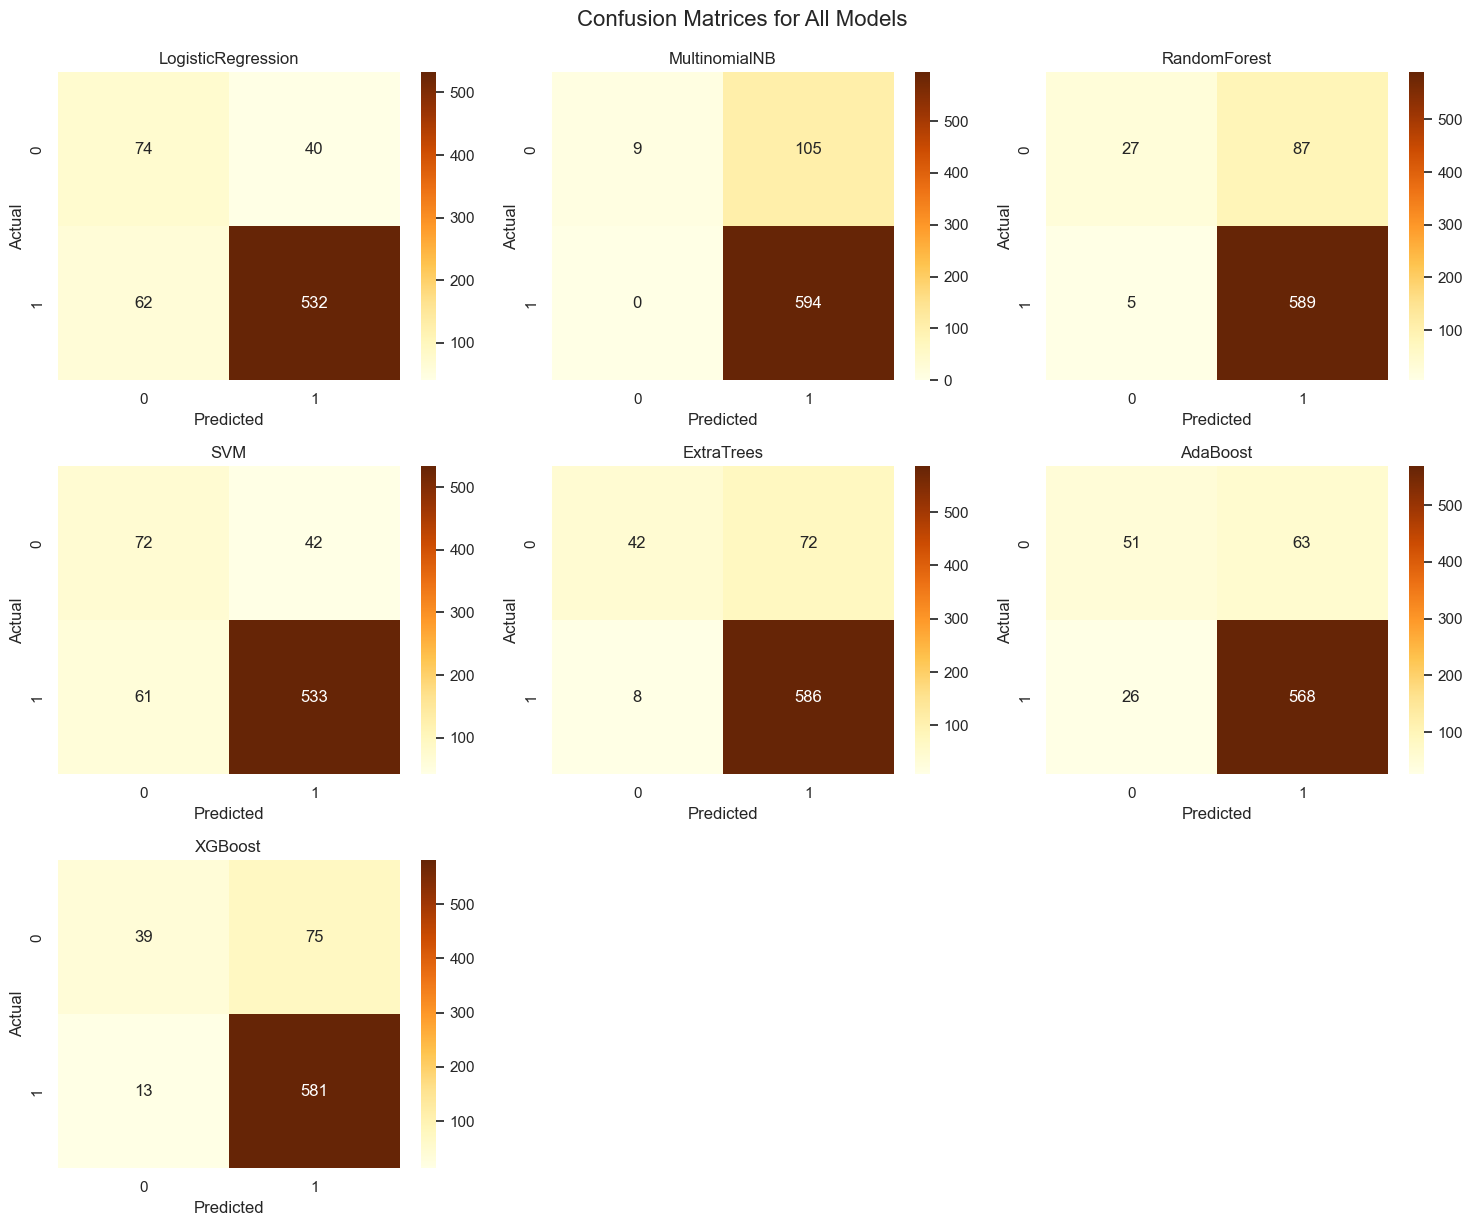

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -----------------------------
# Combined Confusion Matrices
# -----------------------------
num_models = len(model_preds)
cols = 3  # number of columns in the grid
rows = (num_models + cols - 1) // cols  # calculate rows needed

plt.figure(figsize=(cols*5, rows*4))

for i, (name, y_pred) in enumerate(model_preds.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("YlOrBr", as_cmap=True))
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.suptitle('Confusion Matrices for All Models', fontsize=16, y=1.02)
plt.savefig('output/confusion_matrices_combined.png', bbox_inches='tight')
plt.show()


# Confusion Matrices – Summary

- TN = True Negatives | FP = False Positives | FN = False Negatives | TP = True Positives**

### Logistic Regression
- TN=74, FP=40, FN=62, TP=532  
- ✅ Highest precision (0.93)  
- ❌ More false negatives  

### MultinomialNB
- TN=9, FP=105, FN=0, TP=594  
- ✅ Perfect recall (1.0)  
- ❌ Very low precision  

### Random Forest
- TN=27, FP=87, FN=5, TP=589  
- ✅ High recall  
- ❌ Many false positives  

### SVM
- TN=72, FP=42, FN=61, TP=533  
- ✅ Best Macro F1 (0.75, tied)  
- ❌ Higher false negatives  

### Extra Trees
- TN=42, FP=72, FN=8, TP=586  
- ✅ Best ROC AUC (0.90)  
- ✅ Strong balance  
- ❌ Some false positives  

### AdaBoost
- TN=51, FP=63, FN=26, TP=568  
- ✅ Balanced trade-off  
- ❌ Slightly weaker overall  

### XGBoost
- TN=39, FP=75, FN=13, TP=581  
- ✅ Strong recall, low FN  
- ✅ High accuracy & F1  
- ❌ Some false positives  

##  Highlights
- **Precision** → Logistic Regression (0.93)  
- **Recall** → MultinomialNB (1.0)  
- **Macro F1** → Logistic Regression & SVM (0.75)  
- **ROC AUC** → Extra Trees (0.90)  
- **Best Balance** → XGBoost & Extra Trees  


✅ **Extra Trees** and **XGBoost** are strongest overall.  
✅ **Logistic Regression** is safest (few false positives).  
✅ **MultinomialNB** never misses positives but sacrifices precision.  

# Muilticlass classification


In [ ]:
# First copy the dataset
df = data.copy()

# Map known labels to simplified ones
multi_data['sentiment'] = multi_data['sentiment'].replace({
    'Negative emotion': 'negative',
    'Positive emotion': 'positive',
    'No emotion toward brand or product': 'neutral'  
})

# Now fill the missing ones (NaN) with neutral
multi_data['sentiment'] = multi_data['sentiment'].fillna('neutral')

print(multi_data['sentiment'].value_counts())


NameError: name 'multi_data' is not defined

In [ ]:
# preprocess the text
multi_data['tweet_text'] = multi_data['tweet_text'].apply(clean_text)

print(multi_data['tweet_text'].head())

0    iphone hr tweeting dead need upgrade plugin st...
1    know awesome ipadiphone app youll likely appre...
2                                       wait also sale
3       hope year festival isnt crashy year iphone app
4    great stuff fri marissa mayer google tim oreil...
Name: tweet_text, dtype: object


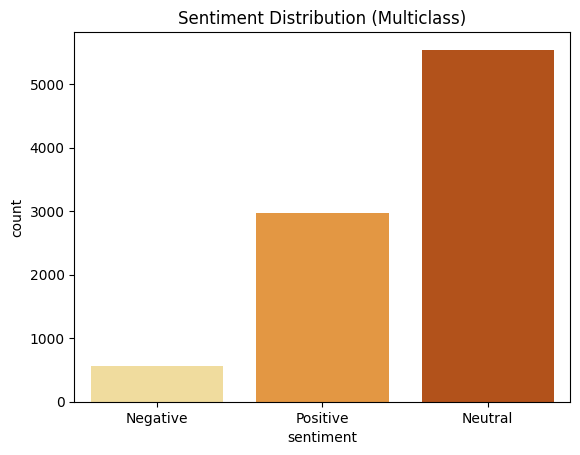

sentiment
neutral     5544
positive    2978
negative     570
Name: count, dtype: int64


In [ ]:
# sentiment distribution
sns.countplot(x='sentiment', data=multi_data, palette='YlOrBr')
plt.title("Sentiment Distribution (Multiclass)")
plt.xticks([0, 1, 2], ['Negative', 'Positive', 'Neutral'])
plt.show()
print(multi_data['sentiment'].value_counts())


In [ ]:
# check for nulls
multi_data.isnull().sum()


tweet_text    0
sentiment     0
dtype: int64

In [ ]:
# split the data
X_multi = multi_data['tweet_text']
y_multi= multi_data['sentiment']

from sklearn.model_selection import train_test_split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)


In [ ]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_multi = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_multi_tfidf = tfidf.fit_transform(X_train_multi)
X_test_multi_tfidf = tfidf.transform(X_test_multi)


In [ ]:
# the data is heavily imbalanced toward neutral
# apply multiclass SMOTE
from imblearn.over_sampling import SMOTE
multi_smote = SMOTE(random_state=42, sampling_strategy='not majority')
X_train_multi_smote, y_train_multi_smote = multi_smote.fit_resample(X_train_multi_tfidf, y_train_multi)

#before smote
print("Before SMOTE:", y_train_multi.value_counts())
#after smote
print("After SMOTE:", y_train_multi_smote.value_counts())

Before SMOTE: sentiment
neutral     4435
positive    2382
negative     456
Name: count, dtype: int64
After SMOTE: sentiment
neutral     4435
negative    4435
positive    4435
Name: count, dtype: int64


### Modeling on multiclass classification

In [ ]:
#1. Logistic Regression
#2. naive Bayes
#3. Random Forest
#4. SVM

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for evalutaion
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#train logistic regression model
log_reg_multi = LogisticRegression()
log_reg_multi.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_log_reg_multi = log_reg_multi.predict(X_test_multi_tfidf)
print("Logistic Regression (Multiclass) Classification Report:")
print(classification_report(y_test_multi, y_pred_log_reg_multi))
print("Confusion Matrix:")
print(confusion_matrix(y_test_multi, y_pred_log_reg_multi))
print("Accuracy:", accuracy_score(y_test_multi, y_pred_log_reg_multi))


# train naive bayes model
nb_multi = MultinomialNB()
nb_multi.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_nb_multi = nb_multi.predict(X_test_multi_tfidf)
print("Naive Bayes (Multiclass) Classification Report:")
print(classification_report(y_test_multi, y_pred_nb_multi))
print("Confusion Matrix:")
print(confusion_matrix(y_test_multi, y_pred_nb_multi))
print("Accuracy:", accuracy_score(y_test_multi, y_pred_nb_multi))


# train random forest model
rf_multi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_multi.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_rf_multi = rf_multi.predict(X_test_multi_tfidf)
print("Random Forest (Multiclass) Classification Report:")
print(classification_report(y_test_multi, y_pred_rf_multi))
print("Confusion Matrix:")
print(confusion_matrix(y_test_multi, y_pred_rf_multi))
print("Accuracy:", accuracy_score(y_test_multi, y_pred_rf_multi))

# train SVM model
svm_multi = SVC(kernel='linear', random_state=42)
svm_multi.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_svm_multi = svm_multi.predict(X_test_multi_tfidf)
print("SVM (Multiclass) Classification Report:")
print(classification_report(y_test_multi, y_pred_svm_multi))
print("Confusion Matrix:")
print(confusion_matrix(y_test_multi, y_pred_svm_multi))
print("Accuracy:", accuracy_score(y_test_multi, y_pred_svm_multi))



Logistic Regression (Multiclass) Classification Report:
              precision    recall  f1-score   support

    negative       0.34      0.56      0.42       114
     neutral       0.76      0.70      0.73      1109
    positive       0.57      0.58      0.58       596

    accuracy                           0.65      1819
   macro avg       0.56      0.61      0.58      1819
weighted avg       0.67      0.65      0.66      1819

Confusion Matrix:
[[ 64  29  21]
 [ 93 779 237]
 [ 34 217 345]]
Accuracy: 0.6531061022539857
Naive Bayes (Multiclass) Classification Report:
              precision    recall  f1-score   support

    negative       0.23      0.64      0.34       114
     neutral       0.80      0.55      0.65      1109
    positive       0.52      0.64      0.58       596

    accuracy                           0.59      1819
   macro avg       0.52      0.61      0.52      1819
weighted avg       0.67      0.59      0.61      1819

Confusion Matrix:
[[ 73  16  25]
 [170 61

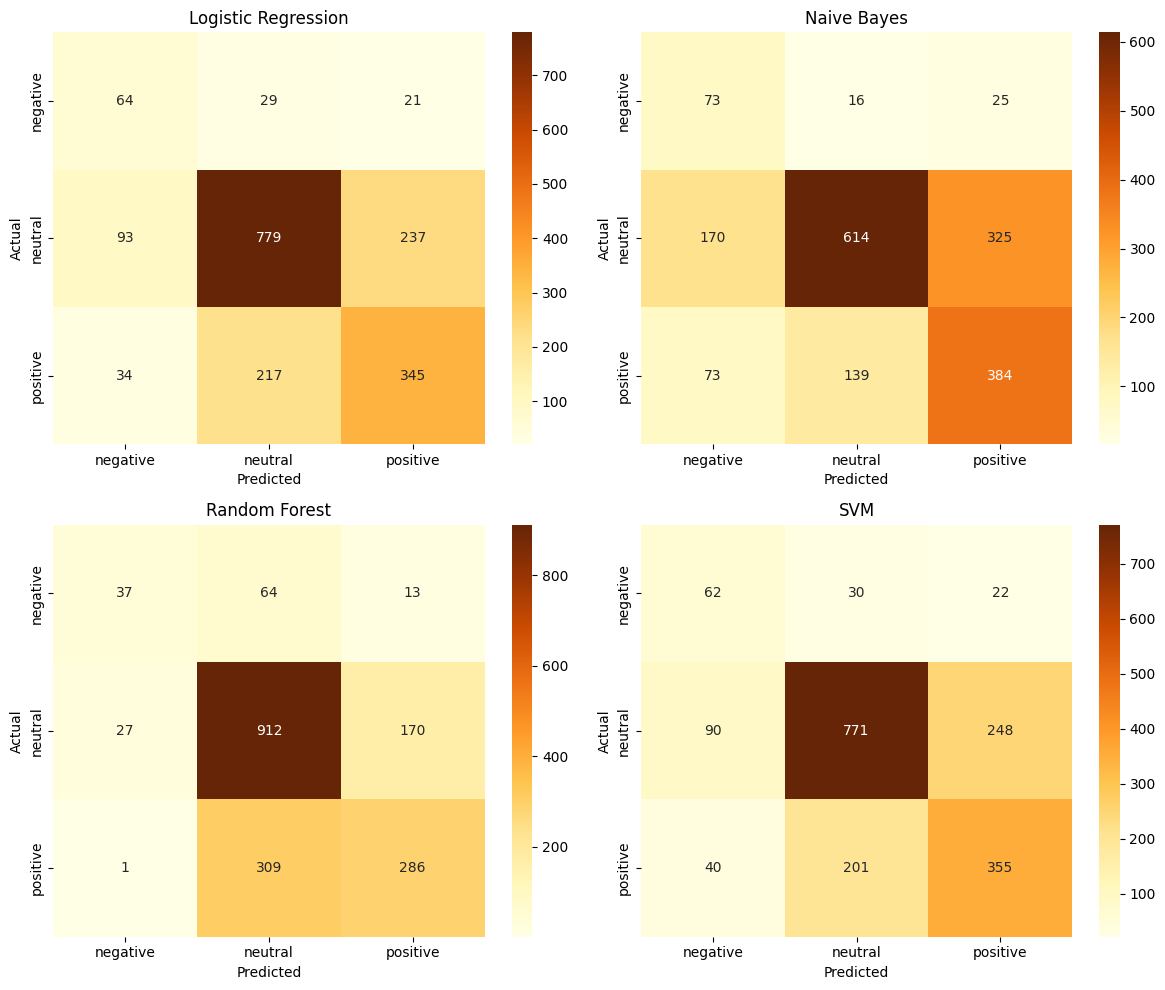

In [ ]:
# plot confusion matrix for logistic regression, naive bayes, random forest, and SVM
import matplotlib.pyplot as plt
import seaborn as sns
models = {
    'Logistic Regression': (y_test_multi, y_pred_log_reg_multi),
    'Naive Bayes': (y_test_multi, y_pred_nb_multi),
    'Random Forest': (y_test_multi, y_pred_rf_multi),
    'SVM': (y_test_multi, y_pred_svm_multi)
}

labels = ['negative', 'neutral', 'positive']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (model_name, (y_true, y_pred)) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# obervations
* Neutral dominates - All models are much better at predicting neutral (majority class).
  Precision & recall for neutral are ~0.70–0.82.
  Minority classes (negative, positive) suffer.
* Negative is the weakest class
  Logistic Regression: recall 0.56 (ok) but precision only 0.34.
  Naive Bayes: recall 0.64, but precision 0.23 (lots of false positives).
  Random Forest: precision 0.57 but recall drops to 0.32.
  SVM: similar to Logistic Regression, low precision.
* Models really struggle to distinguish negative tweets from positive or neutral ones.
  Positive is “middle ground”
  Precision and recall hover ~0.55–0.60.
  Not great, not terrible, but clearly harmed by class imbalance.
* Overall accuracy looks okay (~65–68%), but that’s misleading because it’s mostly driven by the large neutral class.
  

In [ ]:
# Hyperparameter Tuning to improve model performance

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import randint, uniform

# Logistic Regression (GridSearchCV is fine - lightweight model)
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
log_reg_multi_gs = GridSearchCV(LogisticRegression(max_iter=1000),
                                param_grid_log_reg,
                                cv=3,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=2)
log_reg_multi_gs.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_log_reg_multi_gs = log_reg_multi_gs.predict(X_test_multi_tfidf)
print("\nTuned Logistic Regression Report:")
print(classification_report(y_test_multi, y_pred_log_reg_multi_gs))
print("Best Params:", log_reg_multi_gs.best_params_)


# Naive Bayes (lightweight -> GridSearchCV is fine)
param_grid_nb = {'alpha': [0.1, 0.5, 1.0]}
nb_multi_gs = GridSearchCV(MultinomialNB(),
                           param_grid_nb,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)
nb_multi_gs.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_nb_multi_gs = nb_multi_gs.predict(X_test_multi_tfidf)
print("\nTuned Naive Bayes Report:")
print(classification_report(y_test_multi, y_pred_nb_multi_gs))
print("Best Params:", nb_multi_gs.best_params_)


# Random Forest (use RandomizedSearchCV for speed)
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11)
}
rf_multi_rs = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                 param_distributions=param_dist_rf,
                                 n_iter=20,  
                                 cv=3,
                                 scoring='accuracy',
                                 n_jobs=-1,
                                 verbose=2,
                                 random_state=42)
rf_multi_rs.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_rf_multi_rs = rf_multi_rs.predict(X_test_multi_tfidf)
print("\nTuned Random Forest Report:")
print(classification_report(y_test_multi, y_pred_rf_multi_rs))
print("Best Params:", rf_multi_rs.best_params_)


# SVM (RandomizedSearchCV for speed)
param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf']
}
svm_multi_rs = RandomizedSearchCV(SVC(random_state=42),
                                  param_distributions=param_dist_svm,
                                  n_iter=15,
                                  cv=3,
                                  scoring='accuracy',
                                  n_jobs=-1,
                                  verbose=2,
                                  random_state=42)
svm_multi_rs.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_svm_multi_rs = svm_multi_rs.predict(X_test_multi_tfidf)
print("\nTuned SVM Report:")
print(classification_report(y_test_multi, y_pred_svm_multi_rs))
print("Best Params:", svm_multi_rs.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Tuned Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.37      0.49      0.42       114
     neutral       0.75      0.72      0.74      1109
    positive       0.57      0.57      0.57       596

    accuracy                           0.66      1819
   macro avg       0.57      0.60      0.58      1819
weighted avg       0.67      0.66      0.66      1819

Best Params: {'C': 10, 'solver': 'saga'}
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Tuned Naive Bayes Report:
              precision    recall  f1-score   support

    negative       0.27      0.55      0.37       114
     neutral       0.78      0.61      0.68      1109
    positive       0.53      0.64      0.58       596

    accuracy                           0.62      1819
   macro avg       0.53      0.60      0.54      1819
weighted avg       0.67      0.62      0.63      1819

Best Params: {'a

In [ ]:

# Summarize hyperparameter tuning results
results = pd.DataFrame([
    ["Logistic Regression", log_reg_multi_gs.best_params_, log_reg_multi_gs.best_score_, 
     accuracy_score(y_test_multi, y_pred_log_reg_multi_gs)],
    
    ["Naive Bayes", nb_multi_gs.best_params_, nb_multi_gs.best_score_, 
     accuracy_score(y_test_multi, y_pred_nb_multi_gs)],
    
    ["Random Forest", rf_multi_rs.best_params_, rf_multi_rs.best_score_, 
     accuracy_score(y_test_multi, y_pred_rf_multi_rs)],
    
    ["SVM", svm_multi_rs.best_params_, svm_multi_rs.best_score_, 
     accuracy_score(y_test_multi, y_pred_svm_multi_rs)]
], columns=["Model", "Best Params", "Best CV Score", "Test Accuracy"])

print(results)


                 Model                                        Best Params  \
0  Logistic Regression                        {'C': 10, 'solver': 'saga'}   
1          Naive Bayes                                     {'alpha': 0.1}   
2        Random Forest  {'max_depth': None, 'min_samples_split': 4, 'n...   
3                  SVM          {'C': 8.424426408004217, 'kernel': 'rbf'}   

   Best CV Score  Test Accuracy  
0       0.826757       0.660803  
1       0.771665       0.616273  
2       0.832244       0.684442  
3       0.845547       0.680044  


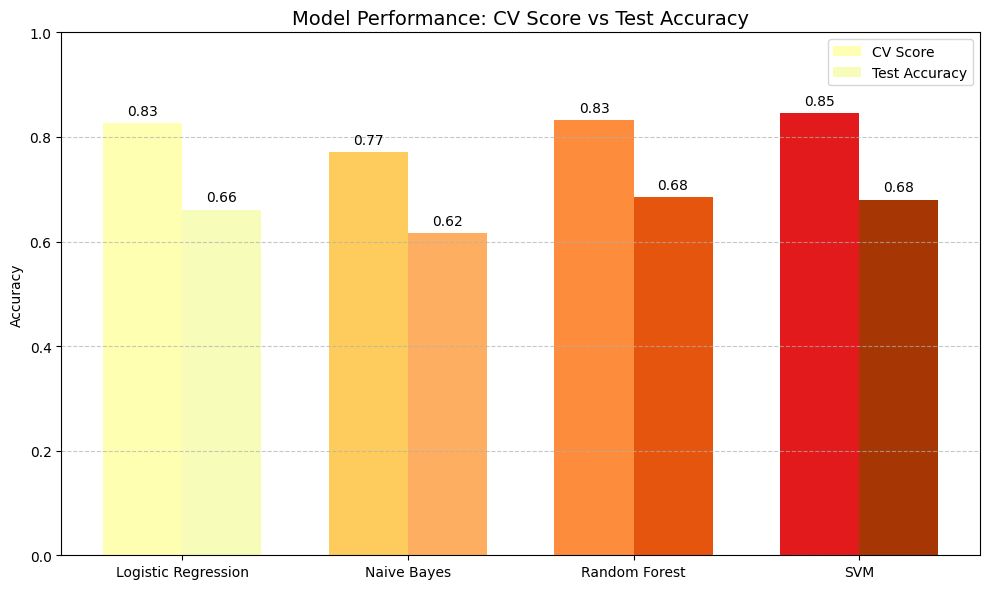

In [ ]:
# Visualize CV Scores vs Test Accuracy
# Prepare data
models = results['Model']
cv_scores = results['Best CV Score']
test_acc = results['Test Accuracy']

x = np.arange(len(models))
width = 0.35

# Define colors from YlOrBr palette
colors_cv = ['#ffffb2', '#fecc5c', '#fd8d3c', '#e31a1c']  # light yellow → brown
colors_test = ['#f7fcb9', '#fdae61', '#e6550d', '#a63603']

# Create bar chart
fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, cv_scores, width, label='CV Score', color=colors_cv)
bars2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color=colors_test)

# Add text labels above bars
for i in range(len(models)):
    ax.text(x[i] - width/2, cv_scores[i] + 0.01, f"{cv_scores[i]:.2f}", ha='center', va='bottom', fontsize=10)
    ax.text(x[i] + width/2, test_acc[i] + 0.01, f"{test_acc[i]:.2f}", ha='center', va='bottom', fontsize=10)

# Formatting
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance: CV Score vs Test Accuracy', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# retrain each model with best parameters and evaluate again

# Logistic Regression
best_lr = LogisticRegression(**log_reg_multi_gs.best_params_, max_iter=1000, class_weight="balanced")
best_lr.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_lr = best_lr.predict(X_test_multi_tfidf)
print("Logistic Regression (Tuned)")
print(classification_report(y_test_multi, y_pred_lr))
print(confusion_matrix(y_test_multi, y_pred_lr))

# Naive Bayes
best_nb = MultinomialNB(**nb_multi_gs.best_params_)
best_nb.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_nb = best_nb.predict(X_test_multi_tfidf)
print("\nNaive Bayes (Tuned)")
print(classification_report(y_test_multi, y_pred_nb))
print(confusion_matrix(y_test_multi, y_pred_nb))

# Random Forest
best_rf = RandomForestClassifier(**rf_multi_rs.best_params_, random_state=42, class_weight="balanced")
best_rf.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_rf = best_rf.predict(X_test_multi_tfidf)
print("\nRandom Forest (Tuned)")
print(classification_report(y_test_multi, y_pred_rf))
print(confusion_matrix(y_test_multi, y_pred_rf))

# SVM
best_svm = SVC(**svm_multi_rs.best_params_, class_weight="balanced")
best_svm.fit(X_train_multi_smote, y_train_multi_smote)
y_pred_svm = best_svm.predict(X_test_multi_tfidf)
print("\nSVM (Tuned)")
print(classification_report(y_test_multi, y_pred_svm))
print(confusion_matrix(y_test_multi, y_pred_svm))


Logistic Regression (Tuned)
              precision    recall  f1-score   support

    negative       0.37      0.49      0.42       114
     neutral       0.75      0.72      0.74      1109
    positive       0.57      0.57      0.57       596

    accuracy                           0.66      1819
   macro avg       0.57      0.60      0.58      1819
weighted avg       0.67      0.66      0.66      1819

[[ 56  37  21]
 [ 69 804 236]
 [ 25 229 342]]

Naive Bayes (Tuned)
              precision    recall  f1-score   support

    negative       0.27      0.55      0.37       114
     neutral       0.78      0.61      0.68      1109
    positive       0.53      0.64      0.58       596

    accuracy                           0.62      1819
   macro avg       0.53      0.60      0.54      1819
weighted avg       0.67      0.62      0.63      1819

[[ 63  23  28]
 [123 675 311]
 [ 44 169 383]]

Random Forest (Tuned)
              precision    recall  f1-score   support

    negative       

In [ ]:
# Compare tuned models' performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of model names and predictions
models_preds = [
    ("Logistic Regression", y_pred_lr),
    ("Naive Bayes", y_pred_nb),
    ("Random Forest", y_pred_rf),
    ("SVM", y_pred_svm)
]

# Create a results list
results_metrics = []

for name, y_pred in models_preds:
    results_metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test_multi, y_pred),
        "Precision": precision_score(y_test_multi, y_pred, average='weighted'),
        "Recall": recall_score(y_test_multi, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test_multi, y_pred, average='weighted')
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(results_metrics)

# Display
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.660803   0.668583  0.660803  0.664044
1          Naive Bayes  0.616273   0.665638  0.616273  0.629911
2        Random Forest  0.684442   0.674211  0.684442  0.671497
3                  SVM  0.680044   0.668933  0.680044  0.669330


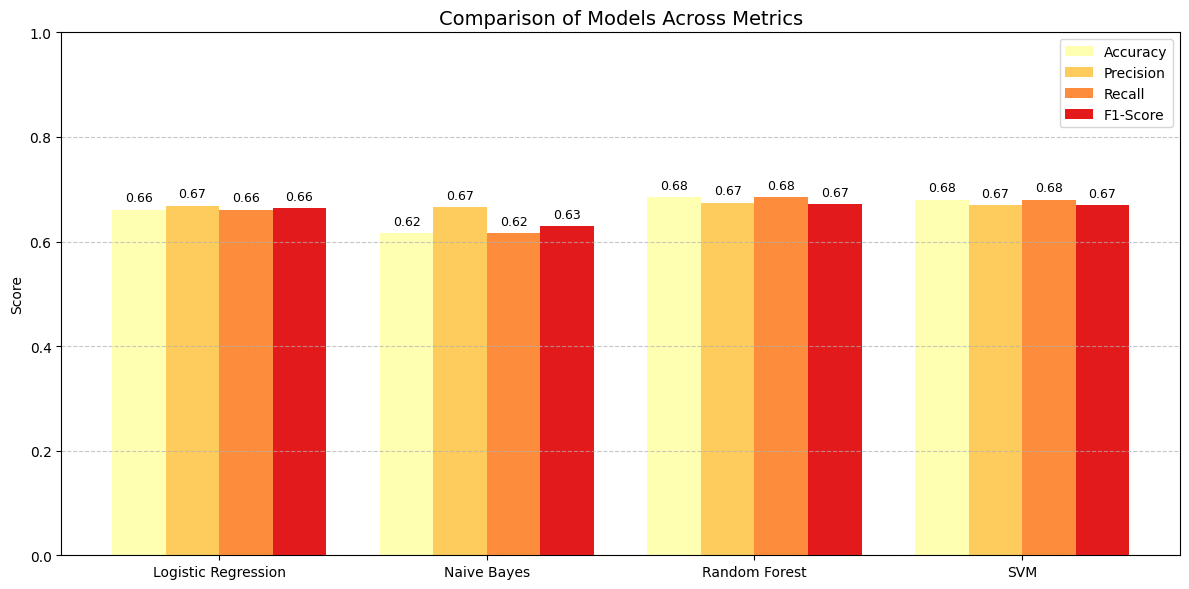

In [ ]:
# Visualize comparison

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
models = metrics_df['Model']
x = np.arange(len(models))
width = 0.2

colors = ['#ffffb2', '#fecc5c', '#fd8d3c', '#e31a1c']

fig, ax = plt.subplots(figsize=(12,6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width*1.5, metrics_df[metric], width, label=metric, color=colors[i])

# Labels and title
ax.set_ylabel("Score")
ax.set_title("Comparison of Models Across Metrics", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0,1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i in range(len(models)):
    for j, metric in enumerate(metrics):
        ax.text(x[i] + j*width - width*1.5, metrics_df[metric][i] + 0.01, 
                f"{metrics_df[metric][i]:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### observations
- Accuracy: Random Forest and SVM are tied at 0.68 — the highest among all models.
- Precision: Logistic Regression and Naive Bayes are slightly higher (0.67), but overall differences are small.
- Recall: Random Forest and SVM again lead (0.68).
- F1-Score: Random Forest and SVM are slightly higher (0.67), indicating better balance between precision and recall.

* Naive Bayes performs worst overall, likely because it assumes feature independence, which isn’t true for your text data.
* Logistic Regression is solid but slightly below Random Forest/SVM in most metrics.
* Random Forest vs SVM:
  Both have similar scores across all metrics.
  Random Forest is usually faster to train, easier to interpret (feature importance), and less sensitive to scaling of features. SVM can be slower on large datasets, and tuning kernel parameters can be tricky.

### Best model
Random Forest is the best model because:
 - It has top test accuracy (0.68).
 - High recall and balanced F1-score.
 - More robust and interpretable than SVM.
 - Handles feature correlations better than Naive Bayes and logistic regression.

### Deep learning with BERT for better context understanding

In [ ]:
# import required models

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [ ]:
# prepare data for BERT

# Encode labels as numbers
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
multi_data['label'] = multi_data['sentiment'].map(label_map)

X = multi_data['tweet_text'].tolist()
y = multi_data['label'].tolist()

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode text for BERT
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Create a PyTorch dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, y_train)
test_dataset = SentimentDataset(test_encodings, y_test)


In [ ]:
#load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_dir='./logs',
    logging_steps=50,
    save_total_limit=2,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
# Train model
trainer.train()

In [ ]:
# Evaluate model
eval_results = trainer.evaluate()
print(eval_results)